# k-meansクラスタリング

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.datasets import make_blobs

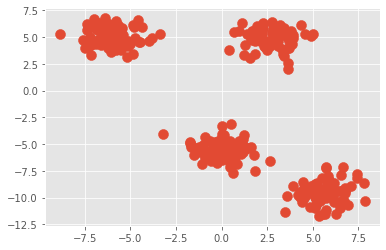

In [3]:
X, y_true = make_blobs(n_samples=300, centers=4, 
                       cluster_std=1.0, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=100);

In [6]:
import cv2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

In [9]:
import numpy as np
compactness, labels, centers = cv2.kmeans(X.astype(np.float32), 4, None, criteria, 10, flags)
compactness

526.6774351084605

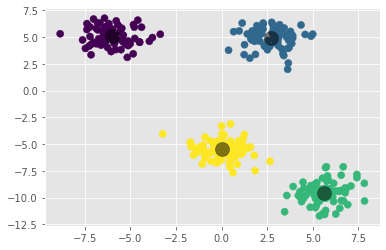

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# 確率最大化法

In [12]:
from sklearn.metrics import pairwise_distances_argmin

In [15]:
def find_clusters(X, n_clusters, rseed=5):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(axis =0) for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
        return centers, labels

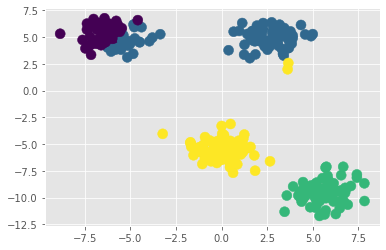

In [16]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis');

#### 確率最大化法の限界

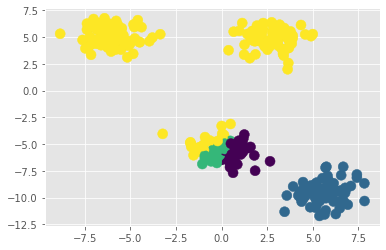

In [17]:
centers, labels = find_clusters(X, 4, rseed = 10)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis')

クラスタ数を事前に決めなければならない

In [20]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
cinoactness, labels, centers = cv2.kmeans(X.astype(np.float32), 6, None, criteria, 10, flags)

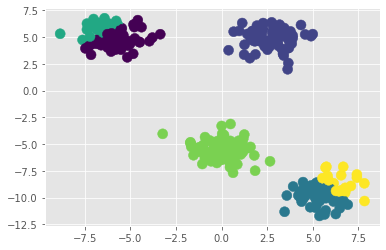

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis')

In [24]:
kvals = np.arange(2, 10)
compactness = []
for k in kvals:
    c, _, _ = cv2.kmeans(X.astype(np.float32), k, None, criteria, 10, flags)
    compactness.append(c)

Text(0, 0.5, 'compactness')

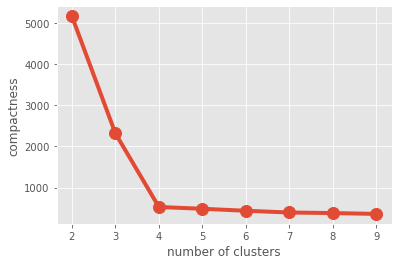

In [25]:
plt.plot(kvals, compactness, 'o-', linewidth=4, markersize=12)
plt.xlabel('number of clusters')
plt.ylabel('compactness')

クラスタの境界は線形

In [26]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=12)

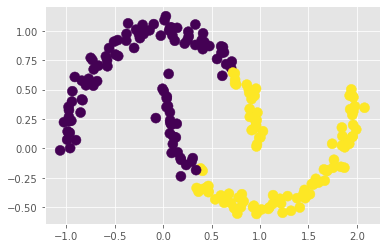

In [29]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv2.kmeans(X.astype(np.float32), 2, None, criteria, 10, flags)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis');

In [30]:
from sklearn.cluster import SpectralClustering

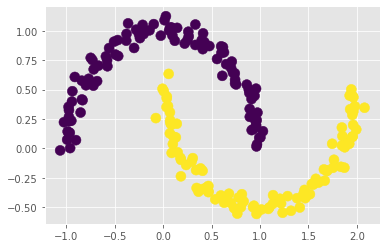

In [31]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis')

サンプルが多いときにはk-meansは遅い